In [1]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.3.0
Keras version: 2.4.0


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
from google.colab import files 
  
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [9]:
import io 
import warnings  ##To Avoid warning
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None) ## To display all the columns in the dataset
df = pd.read_csv(io.BytesIO(uploaded['diamonds.csv'])) 
print(df)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [7]:
df.shape

(53940, 11)

In [11]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [12]:
df.shape

(53940, 10)

In [13]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [16]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
num_feature

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [17]:
category_feature=[feature for feature in df.columns if df[feature].dtype=='O']
category_feature

['cut', 'color', 'clarity']

In [18]:
for feature in category_feature:
    print("the feature is {} and the number of category are {}".format(feature,df[feature].unique()))

the feature is cut and the number of category are ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
the feature is color and the number of category are ['E' 'I' 'J' 'H' 'F' 'G' 'D']
the feature is clarity and the number of category are ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


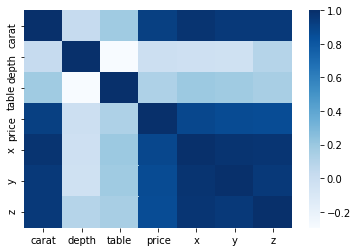

In [19]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="Blues")

In [20]:
x = df.drop('price',1) #Independent Variable
y = df.iloc[:, lambda df: [6]] #Dependent variable

In [21]:
print(x)
print(y)

       carat        cut color clarity  depth  table     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]
       price
0        326
1        326
2        327
3        334
4        335
...      ...
53935   2757
53936   2757
53937   2757
5393

In [22]:
x=pd.get_dummies(x,drop_first=True)

In [23]:
x

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [24]:
x.shape

(53940, 23)

In [25]:
print("train data :", x.shape)
print("test Data :", y.shape)

train data : (53940, 23)
test Data : (53940, 1)


In [26]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (37758, 23)
Testing Data has (16182, 23)


In [27]:
epochs=5
batch_size = 32

In [32]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [33]:
diamondmodel = Sequential()

In [34]:
diamondmodel = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [40]:
optimiser = tf.keras.optimizers.Adam()
diamondmodel.compile (optimizer= optimiser, loss='mse', metrics = ['mae', 'mse'])

In [41]:
diamondmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 23)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               12288     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 17,418
Trainable params: 17,418
Non-trainable params: 0
_________________________________________________________________


In [44]:
diamondmodel.fit(train_x, train_y, batch_size=32,validation_split = 0.3, epochs=5,verbose = 1)

Epoch 1/5
826/826 [==============================] - 2s 2ms/step - loss: 31944222.0000 - mae: 3969.4338 - mse: 31944222.0000 - val_loss: 31012078.0000 - val_mae: 3909.2874 - val_mse: 31012078.0000
Epoch 2/5
826/826 [==============================] - 2s 2ms/step - loss: 31944232.0000 - mae: 3969.4331 - mse: 31944232.0000 - val_loss: 31012078.0000 - val_mae: 3909.2874 - val_mse: 31012078.0000
Epoch 3/5
826/826 [==============================] - 2s 2ms/step - loss: 31944248.0000 - mae: 3969.4351 - mse: 31944248.0000 - val_loss: 31012078.0000 - val_mae: 3909.2874 - val_mse: 31012078.0000
Epoch 4/5
826/826 [==============================] - 2s 2ms/step - loss: 31944226.0000 - mae: 3969.4336 - mse: 31944226.0000 - val_loss: 31012078.0000 - val_mae: 3909.2874 - val_mse: 31012078.0000
Epoch 5/5
826/826 [==============================] - 2s 2ms/step - loss: 31944222.0000 - mae: 3969.4338 - mse: 31944222.0000 - val_loss: 31012078.0000 - val_mae: 3909.2874 - val_mse: 31012078.0000


In [43]:
diamondmodel.evaluate(test_x, test_y)

506/506 [==============================] - 1s 1ms/step - loss: 30720888.0000 - mae: 3889.0730 - mse: 30720888.0000


[30720888.0, 3889.072998046875, 30720888.0]